# A/B Testing: Personalized vs Generic Chatbot Greeting

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest


In [4]:
# Load the dataset
df = pd.read_csv("d:data/chatbot_ab_test_data.csv")

df.head()

,user_id,group,personalized,engaged,time_to_response_sec,session_length_sec
0,1,A,False,0,0.000000,47.879196
1,2,B,True,0,0.000000,42.328084
2,3,A,False,1,10.361531,111.387534
3,4,A,False,0,0.000000,34.581131
4,5,A,False,1,6.995508,122.520306


In [5]:
print("Dataset Shape",df.shape)

Dataset Shape (10000, 6)


In [6]:
print("\nGroup Counts:")
print(df['group'].value_counts())


Group Counts:
group
A    5013
B    4987
Name: count, dtype: int64


In [7]:
print("\nEngagement Rate by Group:")
print(df.groupby('group')['engaged'].mean())


Engagement Rate by Group:
group
A    0.180930
B    0.216363
Name: engaged, dtype: float64


In [9]:
print("\nAvergae Session time:")
print(df.groupby('group'['session_length_sec'].mean())


Svergae Session time:
group
A    58.736459
B    61.057861
Name: session_length_sec, dtype: float64


C:\Users\syeds\AppData\Local\Temp\ipykernel_16136\628173736.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= df, x ='group', y = 'engaged', ci= None)


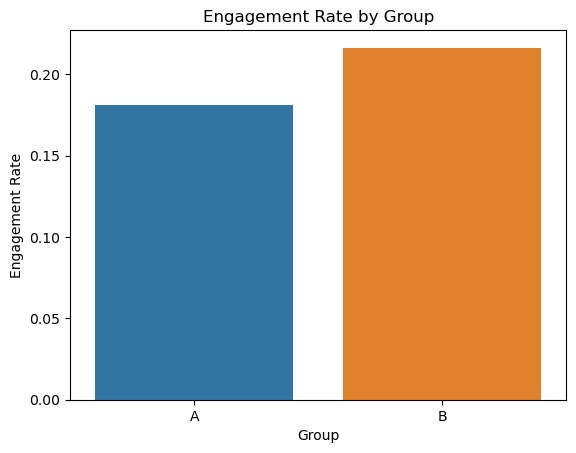

In [16]:
# Plot engagement rates
sns.barplot(data= df, x ='group', y = 'engaged', ci= None)
plt.title("Engagement Rate by Group")
plt.ylabel("Engagement Rate")
plt.xlabel("Group")
plt.show()

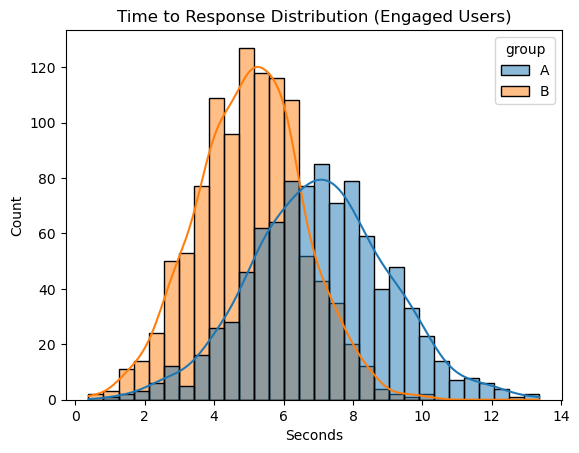

In [17]:
# Plot time to response for engaged users
sns.histplot(data=df[df['engaged'] == 1], x="time_to_response_sec", hue="group", bins=30, kde=True)
plt.title("Time to Response Distribution (Engaged Users)")
plt.xlabel("Seconds")
plt.show()

### A/B Hypothesis Testing 

In [20]:
# H0: No difference in engagement rate
# H1: Personalized greeting increases engagement

# Count engaged and total in each group
a_engaged = df[df['group'] == 'A']['engaged'].sum()
a_total = df[df['group'] == 'A']['engaged'].count()
b_engaged = df[df['group'] == 'B']['engaged'].sum()
b_total = df[df['group'] == 'B']['engaged'].count()

count = np.array([a_engaged, b_engaged])
nobs = np.array([a_total, b_total])

stat, pval = proportions_ztest(count, nobs)
print(f"Z-test statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")

Z-test statistic: -4.4408
P-value: 0.0000


In [21]:
# Calculate uplift
uplift = (b_engaged / b_total - a_engaged / a_total) / (a_engaged / a_total) * 100
print(f"Engagement uplift with personalization: {uplift:.2f}%")


Engagement uplift with personalization: 19.58%


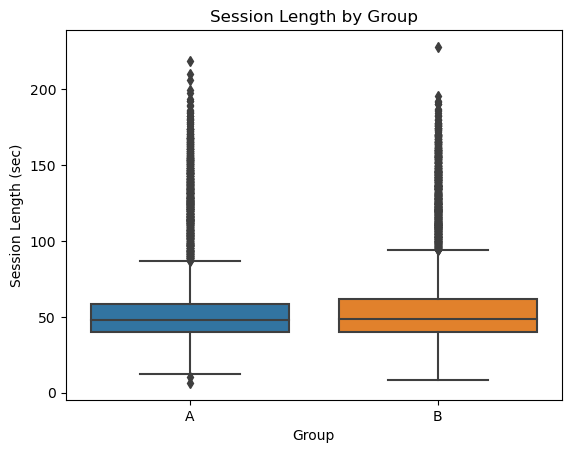

In [22]:
# --- Session Length Analysis ---
sns.boxplot(data=df, x="group", y="session_length_sec")
plt.title("Session Length by Group")
plt.ylabel("Session Length (sec)")
plt.xlabel("Group")
plt.show()

In [23]:
# Summary
print("\nConclusion:")
if pval < 0.05:
    print("✅ Personalized greetings led to a statistically significant increase in engagement.")
else:
    print("❌ No statistically significant difference in engagement between groups.")



Conclusion:
✅ Personalized greetings led to a statistically significant increase in engagement.
